# Chapter 7 : Derivatives

Pg.139-165

# Introduction

- Each weight and bias have different degrees of influence on loss
- Our goal is to decrease loss and we do this by using gradient descent
- Gradient = a result of a calculation of partial derivatives
- Derivatives = calculated from functions taking single parameters

# The Impact of a Parameter on the Output

X: [0 1 2 3 4]
Y: [0 2 4 6 8]


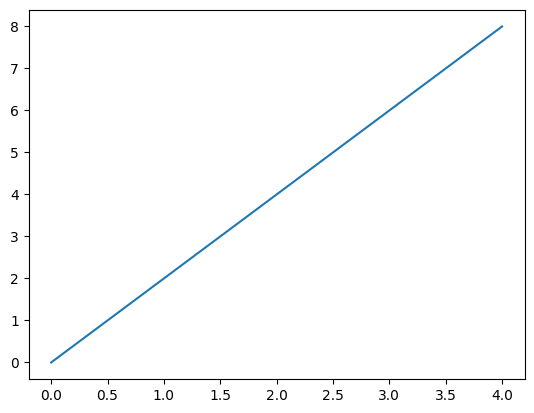

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Simple Function : y = 2x
def f(x):
    return 2 * x

x = np.array(range(5))
y = f(x)

print(f"X: {x}")
print(f"Y: {y}")

plt.plot(x, y)
plt.show()

# The Slope

In [5]:
# calculate the slope of the function
# Slope = Y1 - Y0 / X1 - X0
print("Slope: ", (y[1] - y[0]) / (x[1] - x[0]))

Slope:  2.0


Slope is 2. We could say the measure of the impact that X has on Y is 2.

In [6]:
# Non-linear Function : y = x^2
def f(x):
    return 2*x**2 # 2x^2

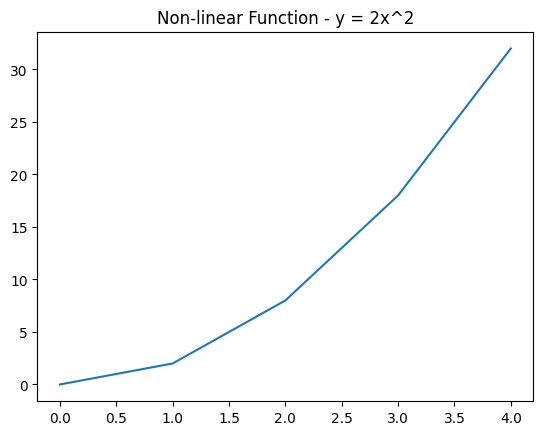

In [17]:
plt.plot(x, y)
plt.title("Non-linear Function - y = 2x^2")
plt.show()

The slope will be different based on which 2 points we choose to use to calculate the slope.

In [15]:
y = f(x)

print(f"X: {x}")
print(f"Y: {y}")

print(f"Slope for points ({x[1], y[1]} and ({x[2], y[2]}): ", (y[1] - y[0]) / (x[1] - x[0]))
print(f"Slope for points ({x[2], y[2]} and ({x[3], y[3]}): ", (y[2] - y[1]) / (x[2] - x[1]))

X: [0 1 2 3 4]
Y: [ 0  2  8 18 32]
Slope for points ((1, 2) and ((2, 8)):  2.0
Slope for points ((2, 8) and ((3, 18)):  6.0


In [20]:
p2_delta = 0.0001

x1 = 1
x2 = x1 + p2_delta

y1 = f(x1) # result at derivation point
y2 = f(x2) # result at other, close point

approximate_derivative = (y2 - y1) / (x2 - x1)
print(f"Approximate Derivative: {approximate_derivative}")

Approximate Derivative: 4.0001999999987845


# The Numerical Derivative

Numerical Differentiation - calculating the slope of the tangent line using two infinitely close points.
- We want closer points to get a more accurate slope

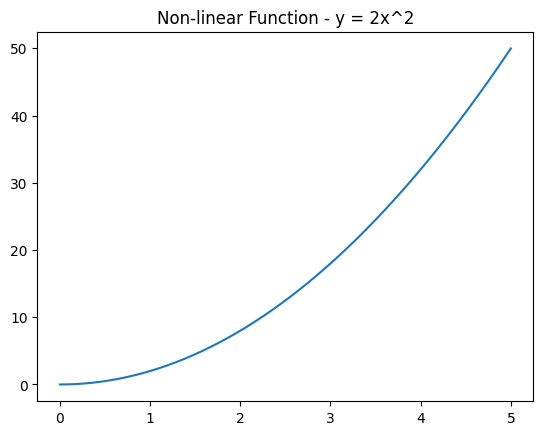

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2*x**2

# np.arange(start, stop, step) to give us smoother line
x = np.arange(0, 5, 0.001)
y = f(x)

plt.plot(x, y)
plt.title("Non-linear Function - y = 2x^2")

plt.show()

In [24]:
# visualizing tangent line
# equation of line: y = mx + b
# only missing b so we can calculate it
# b = y - mx

b = y2 - approximate_derivative * x2

(2, 8) (2.0001, 8.000800020000002)
Approximate derivative for f(x) where x = 2 is 8.000199999998785


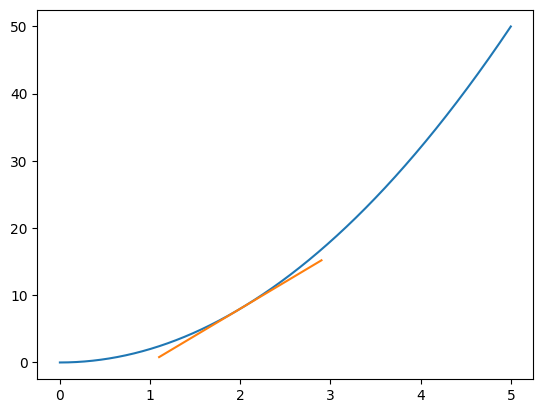

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2*x**2

# np.arange(start, stop, step) to give us smoother line
x = np.arange(0, 5, 0.001)
y = f(x)
plt.plot(x, y)

# the point and the close enough point
p2_delta = 0.0001
x1 = 2
x2 = x1 + p2_delta

y1 = f(x1) # result at derivation point
y2 = f(x2) # result at other, close point

print((x1, y1), (x2, y2))

# derivative approximation and y-intercept for the tangent line
approximate_derivative = (y2 - y1) / (x2 - x1)
b = y2 - approximate_derivative * x2

# we put the tangent line calculation into a function so we can call it multiple times for different values of x
# approximate derivative and b are constant for given function
# thus calculated once above this function
def tangent_line(x):
    return approximate_derivative * x + b

# plotting the tangent line
# +/- 0.9 to draw the tangent line on our graph
# then we calculate the y for given x using the tangent line function
# matplotlib will draw the line for us through these points
to_plot = [x1 - 0.9, x1, x1 + 0.9]
plt.plot(to_plot, [tangent_line(i) for i in to_plot])

print(f"Approximate derivative for f(x) where x = {x1} is {approximate_derivative}")

plt.show()

(0, 0) (0.0001, 2e-08)
Approximate derivative for f(x) where x = 0 is 0.00019999999999999998
(1, 2) (1.0001, 2.00040002)
Approximate derivative for f(x) where x = 1 is 4.0001999999987845
(2, 8) (2.0001, 8.000800020000002)
Approximate derivative for f(x) where x = 2 is 8.000199999998785
(3, 18) (3.0001, 18.001200020000002)
Approximate derivative for f(x) where x = 3 is 12.000199999998785
(4, 32) (4.0001, 32.00160002)
Approximate derivative for f(x) where x = 4 is 16.000200000016548


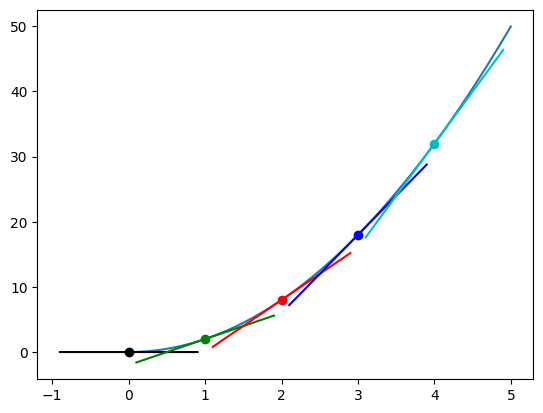

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2*x**2

# np.arange(start, stop, step) to give us smoother line
x = np.arange(0, 5, 0.001)
y = f(x)

plt.plot(x, y)

colors = ['k', 'g', 'r', 'b', 'c']

def approximate_tangent_line(x, approximate_derivative):
    return (approximate_derivative * x) + b
for i in range(5):
    p2_delta = 0.0001
    x1 = i
    x2 = x1 + p2_delta

    y1 = f(x1) # result at derivation point
    y2 = f(x2) # result at other, close point

    print((x1, y1), (x2, y2))
    approximate_derivative = (y2 - y1) / (x2 - x1)
    b = y2 - approximate_derivative * x2

    to_plot = [x1 - 0.9, x1, x1 + 0.9]

    plt.scatter(x1, y1, color=colors[i])
    plt.plot([point for point in to_plot],
             [approximate_tangent_line(point, approximate_derivative) for point in to_plot],
               c=colors[i])
    print(f"Approximate derivative for f(x) where x = {x1} is {approximate_derivative}")
plt.show()

# The Analytical Derivative

This approach, Analytical Differentiation, is the actual calculation we'll implement. 

## Numerical Derivative vs Analytical Derivative

### Numerical Derivative
- involves coming up with a number to find a solution (approximate derivative)
- does not vary in complexity

### Analytical Derivative
- offers the exact and much quicker solution
- varies in complexity
- some analytical solutions are quite obvious and simple
- some analytical solutions are complex and require breaking down into smaller parts and calculated using chain rule
- Compute Derivatives:
1. Split into simple elemental functions
2. Find the derivative of each elemental function
3. Apply the chain rule to get full derivative

## Derivative of Linear Function

![Derivative of Linear Function](../references/deriv_linear.png)

The derivative of a linear function equals the slope (m). 

f(x) = mx   ----> f'(x) = m

f(x) = 2x

f'(x) = 2

This approach produces an exact derivative not an approximation like the numerical derivative.

## Derivative of Quadratic Function

![Derivative of Quadratic Function](../references/deriv_quad.png)

## Analytical Derivative of Multi-Dimensional Function

![Derivative of Multi-Dimensional Function](../references/deriv_multi.png)

# Summary

## Derivative of Constant

Derivative of a constant equals 0.

d/dx 1 = 0


d/dx m = 0

## Derivative of X

Derivative of x equals 1.

d/dx x = 1

## Derivative of Linear Function

Derivative of a linear function equals the slope (m).

d/dx mx + b = m

## Derivative of Sum of Functions

Derivative of the sum of functions equals the sum of the derivatives.

![Derivative of Sum of Functions](../references/deriv_sum.png)

## Derivative of Exponentiation

![](../references/deriv_expo.png)